# TD 3 (sujet 6) : Algorithmes probabilistes et inégalités

Réalisé par : **Thomas REMY**

In [1]:
import math
import random
from cProfile import label
from typing import Callable, Tuple

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

import src.td3.boite_noire as boite_noire
import src.td3.miller_rabin as miller_rabin

## Méthode de Monte Carlo

### Coupon Collector's Problem

Pour cette première question, nous allons écrire une fonction permettant la simulation du problème donné.

In [2]:
def simule_ccp(n: int) -> int:
    coupon_tires = [False] * n
    i = 0
    while sum(coupon_tires) < n:
        coupon = random.randrange(0, n)
        coupon_tires[coupon] = True
        i += 1
    return i

La complexité de cette fonction en nombre de tirages dépend de $n$ et équivaut au nombre de tirages réels qu'il faut effectuer en moyenne pour obtenir les $n$ valeurs uniques.

Soit $Y$ la variable aléatoire égale au nombre de tirages à effectuer pour obtenir au moins une fois les $n$ valeurs indépendantes et $Y_i$ la variable aléatoire associée au nombre de tirages à faire pour passer de $i - 1$ valeurs uniques obtenus à $i$.
$Y_i \sim \mathrm{Geometrique}(p)$, où $p = \frac{n - i + 1}{n}$.

On a alors $\mathbb{E}(Y_i) = \frac{n}{n - i + 1}$. Comme $\mathbb{E}(Y_1 + Y_2 + \cdots + Y_n) = \mathbb{E}(Y_1) + \mathbb{E}(Y_2) + \cdots + \mathbb{E}(Y_n)$, on a :

$$
    \begin{align}
        \mathbb{E}(Y) &= \sum_i \mathbb{E}(Y_i)\\
        &= n * \sum_{i = 1}^n \frac{1}{i} \approx n \log n
    \end{align}
$$

Nous allons maintenant chercher à montrer que $\mathop{\mathrm{var}}(Y) \leqslant n^2 (\frac{1}{1^2} + \frac{1}{2^2} + \cdots + \frac{1}{n^2}) \leqslant n^2 \frac{\pi ^2}{6}$.

Nous savons d'après l'énoncé du problème que les $Y_i$ sont indépendants. Nous avons donc :

$$
    \begin{align}
        \mathop{\mathrm{var}}(Y_1 + Y_2 + \cdots + Y_n) = \mathop{\mathrm{var}}(Y_1) + \mathop{\mathrm{var}}(Y_2) + \cdots + \mathop{\mathrm{var}}(Y_n) &= \sum_{i = 1}^n \mathop{\mathrm{var}}(Y_i)\\
        &= \sum_{i = 1}^n \frac{1 - \frac{n - i + 1}{n}}{(\frac{n - i + 1}{n})^2}\\
        &= \sum_{i = 1}^n \frac{n}{n} - \frac{n - i + 1}{n} * \frac{n^2}{(n - i + 1)^2}\\
        &= \sum_{i = 1}^n \frac{i - 1}{n} * \frac{n^2}{(n - i + 1)^2}\\
        &= \sum_{i = 1}^n \frac{n(i - 1)}{(n - i + 1)^2}\\
        &= n \sum_{i = 1}^n \frac{i - 1}{(n - i + 1)^2}\\
        &= n(\frac{1}{(n - 1)^2} + \frac{2}{(n - 2)^2} + \cdots + n)
    \end{align}
$$

Nous allons maintenant définir une fonction permettant le calcul de la moyenne de $k$ réalisations de l'expérience (qui est un estimateur non biaisé de l'espérance).

In [3]:
def moyenne(n: int, k: int) -> float:
    return sum(simule_ccp(n) for _ in range(k)) / k

In [4]:
def esperance(n: int) -> float:
    return n * sum([1 / i for i in range(1, n + 1)])

def variance(n: int) -> float:
    return esperance(n ** 2) - (esperance(n) ** 2)

On écrit ici une fonction permettant de calculer le $k_n$ minimal en fonction d'un $n$, de la précision $\alpha$ et d'une confiance donnés.

In [5]:
def kn_min(n: int, alpha: float, trust: float) -> int:
    
    return 0

In [6]:
def viz_dispersion(n: int, k: int) -> plt.Figure:
    fig, ax = plt.subplots()
    valeurs = []
    moyennes = []
    abscisses = []
    for i in range(1, n + 1):
        valeurs.extend(simule_ccp(i) for _ in range(k))
        moyennes.append(sum(valeurs[(i - 1) * k:i * k + 1]) / k)
        abscisses.extend(i for _ in range(k))
    ax.scatter(abscisses, valeurs, c="k", alpha=.05, s=.5, label="deviation")
    ax.plot(list(range(1, n + 1)), moyennes, c="k", label="mean")
    
    ax.set_title("Coupon Collector Problem: mean and deviation")
    ax.set_xlabel("number of coupons (n)")
    ax.set_ylabel("number of draws")
    ax.legend()
    return fig

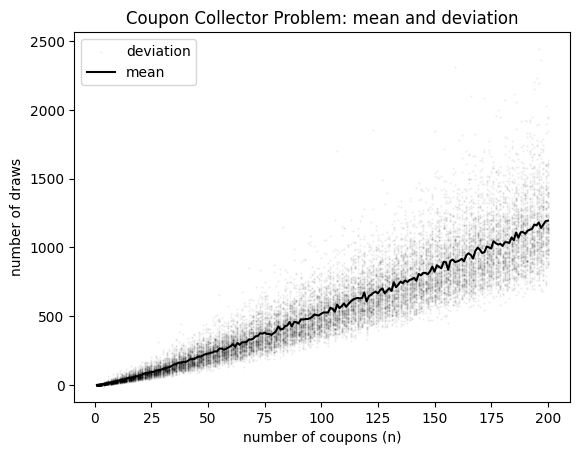

In [7]:
viz_dispersion(200, 100);

### D'autres intégrales

Nous allons maintenant essayer d'approximer les intégrales de plusieurs fonctions à l'aide de la méthode de Monte-Carlo.

In [8]:
def approx_integral(f: Callable, nb_points: int, *args) -> Tuple[list, list, float]:
    x_tab = [tuple(random.uniform(args[i], args[i - 1]) for i in range(1, len(args) // 2 + 1)) for _ in range(nb_points)]
    f_x_tab = [f(*x) for x in x_tab]
    return list(x_tab), list(f_x_tab), sum(f_x_tab) / nb_points

In [9]:
print(f"{approx_integral(boite_noire.fonction1, 100, 0, 1)[-1]=}")
print(f"{approx_integral(boite_noire.fonction2, 100, 0, math.sqrt(3))[-1]=}")
print(f"{approx_integral(boite_noire.fonction3, 100, 3, 4, 2, 4)[-1]=}")
print(f"{approx_integral(boite_noire.fonction4, 100, 2, 3, 3, 7, 1, 4)[-1]=}")

approx_integral(boite_noire.fonction1, 100, 0, 1)[-1]=2.530399771993155
approx_integral(boite_noire.fonction2, 100, 0, math.sqrt(3))[-1]=1.0032756250650838
approx_integral(boite_noire.fonction3, 100, 3, 4, 2, 4)[-1]=20.028148306222086
approx_integral(boite_noire.fonction4, 100, 2, 3, 3, 7, 1, 4)[-1]=848.9612384102736


In [10]:
def fonction5(x: float) -> float:
    return x * (1 - x) * math.sin(200 * x * (1 - x)) ** 2

def viz_monte_carlo(f: Callable, nb_points: int, *args) -> plt.Figure:
    fig, ax = plt.subplots()
    x, y, _ = approx_integral(f, nb_points, *args)
    xy = list(zip(x, y))
    xy.sort(key=lambda i: i[0])
    x, y = zip(*xy)
    ax.plot(x, y, c="k", label="f(x)")
    
    ax.set_title(f"{f.__name__}")
    ax.set_xlabel("generated values (x)")
    ax.set_ylabel("f(x)")
    ax.legend()
    return fig

Visualisons maintenant la courbe générée par la méthode de Monte-Carlo.

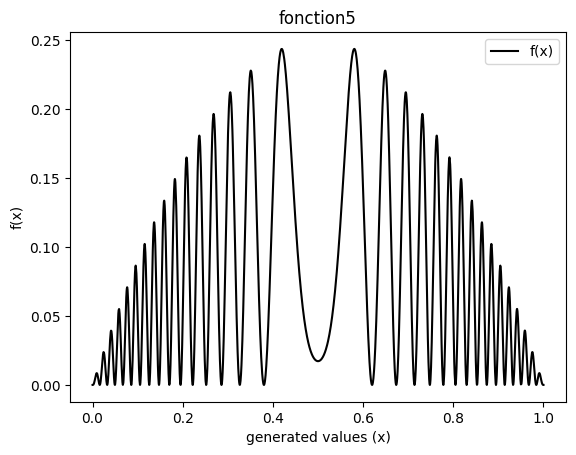

In [11]:
viz_monte_carlo(fonction5, 5000, 0, 1);

## Un algorithme de Monte Carlo : le test de primalité

Le test de primalité de Miller-Rabin est un algorithme de Monte-Carlo car il se base sur une source aléatoire et que son temps de calcul est déterministe. On tire un entier, puis on vérifie une propriété sur ce dernier (qui est vraie avec une probabilité de 75% si le nombre n'est pas premier).

In [12]:
def test_miller_rabin(n: int, k: int) -> float:
    random_values = [random.getrandbits(k) for _ in range(n)]
    miller_rabin_100 = [miller_rabin.miller_rabin(val, 100) for val in random_values]
    val_primes_100 = list(zip(random_values, miller_rabin_100))
    
    miller_rabin_1 = [miller_rabin.miller_rabin(val, 1) for val in random_values]
    val_primes_1 = list(zip(random_values, miller_rabin_1))
    
    err = 0
    for i in range(n):
        if (miller_rabin_100[i] is True) and (miller_rabin_1[i] is False):
            err += 1
            
    return err / n

In [13]:
print(f"{test_miller_rabin(100, 1000)=}% error rate")

test_miller_rabin(100, 1000)=0.0% error rate


Nous remarquons que le taux d'erreur est nul. Cela est normal et dû au fait que le test de Miller-Rabin renvoie Vrai si le nombre est premier, pas si c'est un témoin.

In [14]:
def test_miller_rabin_difficult(n: int, k: int) -> float:
    values = [miller_rabin.get_prime(k) * miller_rabin.get_prime(k) for _ in range(n)]
    err = 0
    for value in values:
        res = []
        for _ in range(1000):
            res.append(miller_rabin.miller_rabin(value, 1))
        
        for r in res:
            if r:
                err += 1
    return err / n

In [15]:
print(f"{test_miller_rabin_difficult(10, 500)=}% error rate")

test_miller_rabin_difficult(10, 500)=0.0% error rate
